<a href="https://colab.research.google.com/github/monifonse/Deber/blob/main/AirPassengers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np

from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sn

In [44]:
ruta_archivo = '/content/AirPassengers.csv'


In [45]:
df = pd.read_csv('/content/AirPassengers.csv')

In [46]:
print(df)

       Month  #Passengers
0    1949-01          112
1    1949-02          118
2    1949-03          132
3    1949-04          129
4    1949-05          121
..       ...          ...
139  1960-08          606
140  1960-09          508
141  1960-10          461
142  1960-11          390
143  1960-12          432

[144 rows x 2 columns]


In [47]:
dt_ind = pd.read_csv('/content/AirPassengers.csv', parse_dates=['Month'], index_col='Month')

In [48]:
dt_ind.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [49]:
dt = dt_ind.copy()
dt.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


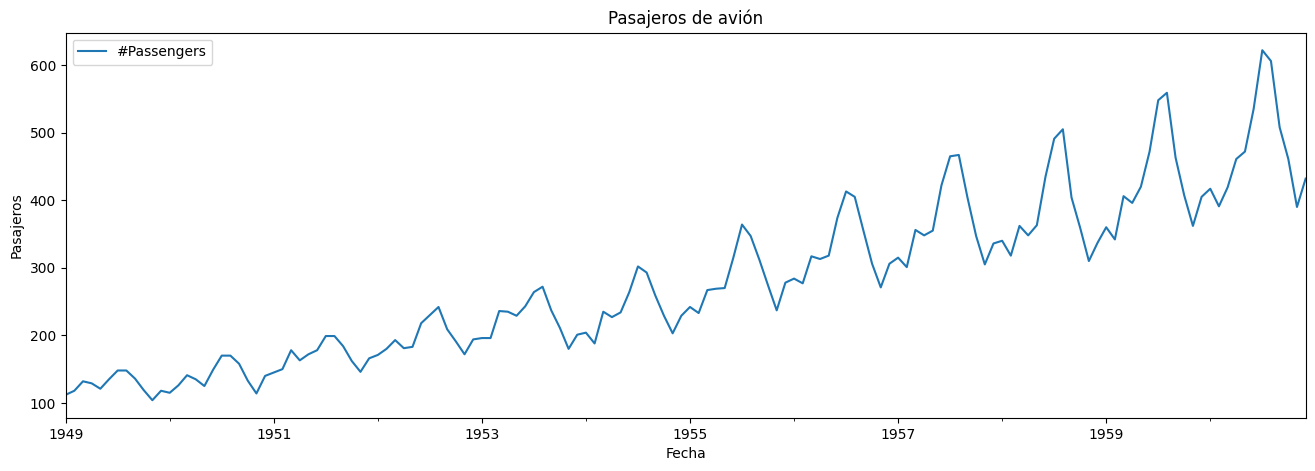

In [50]:
ax = dt.plot(figsize=(16,5), title='Pasajeros de avión');
ax.set_xlabel("Fecha");
ax.set_ylabel("Pasajeros");

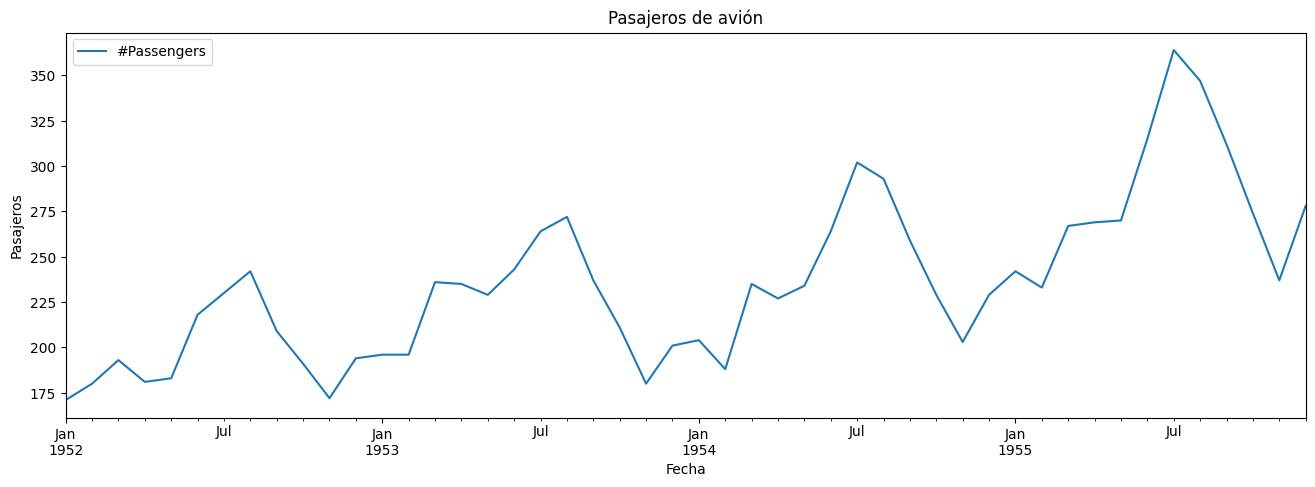

In [51]:
START_YEAR = 1952
END_YEAR = 1955

dt_zoom = dt[(dt.index.year >= START_YEAR) & (dt.index.year <= END_YEAR)]

ax = dt_zoom.plot(figsize=(16,5), title='Pasajeros de avión');
ax.set_xlabel("Fecha");
ax.set_ylabel("Pasajeros");

DESCOMPONIENDO UNA SERIE TEMPORAL

In [55]:
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

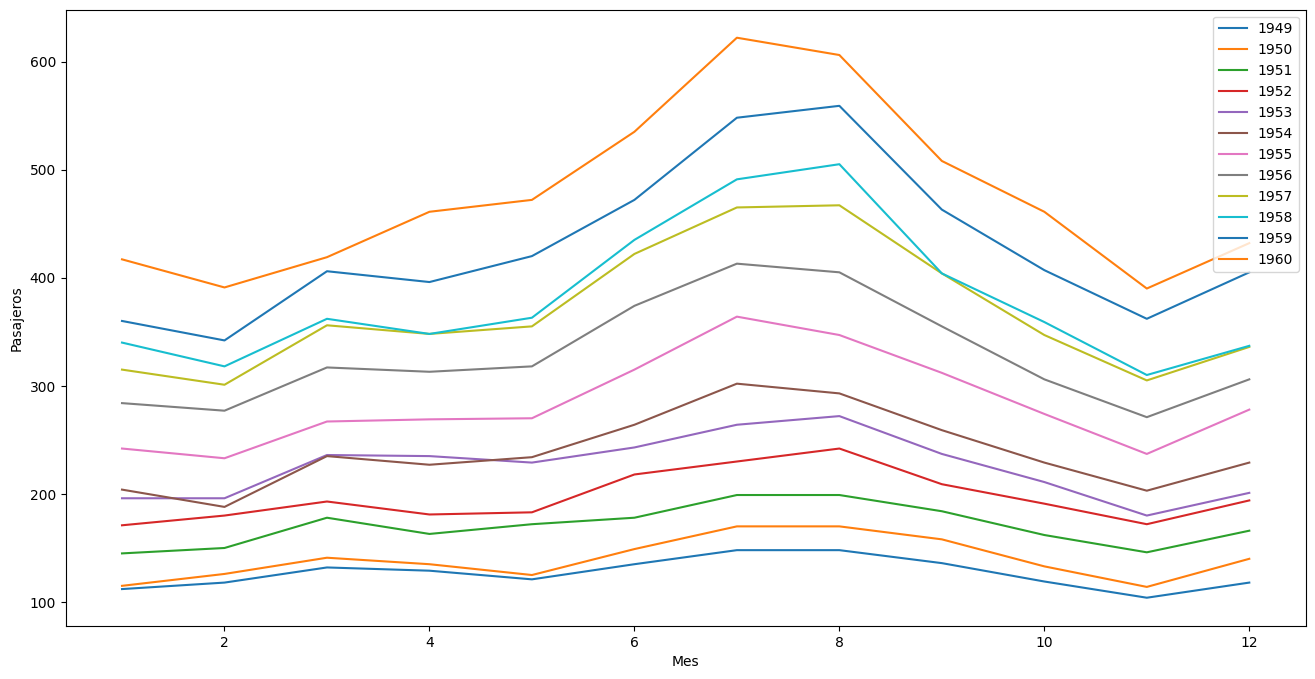

In [56]:
dt_agg = dt.copy()
dt_agg['year'] = dt.index.year
dt_agg['month'] = dt.index.month
dt_pivot = pd.pivot_table(dt_agg, values='#Passengers', index='month', columns='year', aggfunc='mean')
dt_pivot.plot(figsize=(16,8))
plt.legend()
plt.xlabel('Mes')
plt.ylabel('Pasajeros')
plt.show()

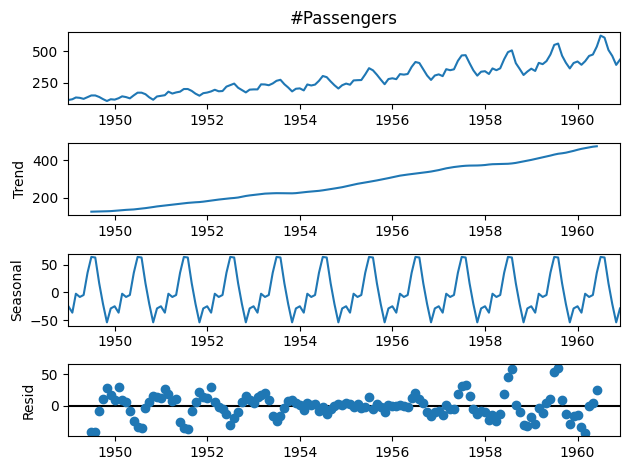

In [62]:
additive = seasonal_decompose(dt['#Passengers'], model='additive', period=12)
additive.plot()
plt.show();

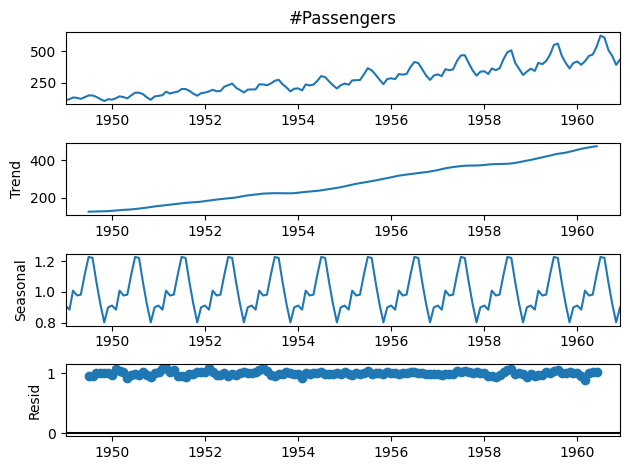

In [64]:
multiplicative = seasonal_decompose(dt['#Passengers'], model='multiplicative', period=12)
multiplicative.plot();
plt.show();

AUTOCORRELACIONES DE UNA SERIE TEMPORAL

In [65]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf, pacf

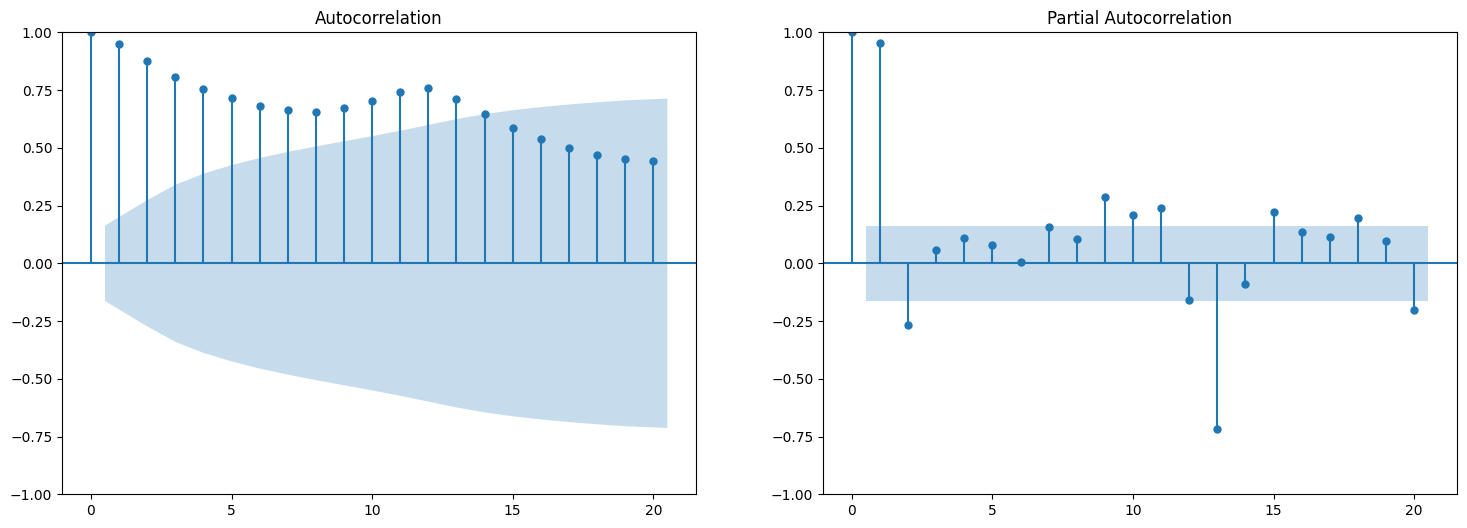

In [66]:
fig, ax = plt.subplots(1,2,figsize=(18,6))
plot_acf(dt, lags=20, ax=ax[0])
plot_pacf(dt, lags=20, ax=ax[1])
plt.show()

In [67]:
acf_coef = acf(dt)
print(acf_coef)

[1.         0.94804734 0.87557484 0.80668116 0.75262542 0.71376997
 0.6817336  0.66290439 0.65561048 0.67094833 0.70271992 0.74324019
 0.76039504 0.71266087 0.64634228 0.58592342 0.53795519 0.49974753
 0.46873401 0.44987066 0.4416288  0.45722376]


In [68]:
pacf_coef = pacf(dt)
print(pacf_coef)

[ 1.          0.95467704 -0.26527732  0.05546955  0.10885622  0.08112579
  0.00412541  0.15616955  0.10370833  0.28878144  0.20691805  0.2411297
 -0.15800498 -0.7183246  -0.08948064  0.22160591  0.13462253  0.11561572
  0.1948294   0.09665618 -0.20215868 -0.0936381 ]


SMOOTHIN AVERAGE

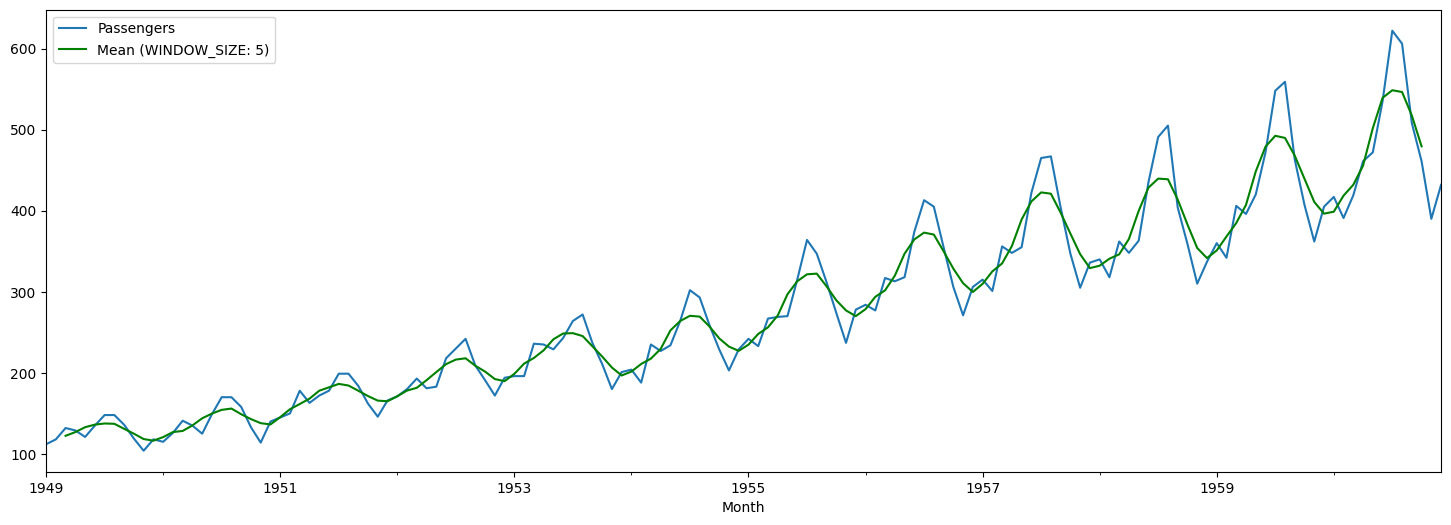

In [69]:
WINDOW_SIZE = 5

r = dt.rolling(window = WINDOW_SIZE, center=True)

figure(figsize=(18, 6))
dt['#Passengers'].plot(label='Passengers')
r.mean()['#Passengers'].plot(label='Mean (WINDOW_SIZE: '+str(WINDOW_SIZE) + ')', color='green');
plt.legend();

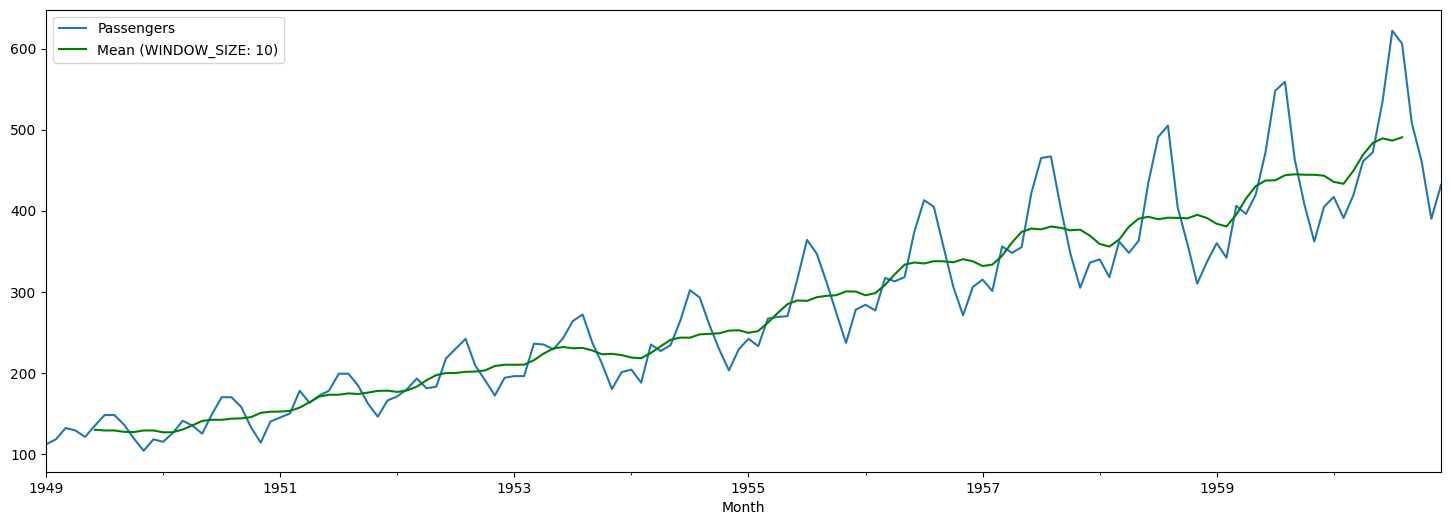

In [70]:
WINDOW_SIZE = 10

r = dt.rolling(window = WINDOW_SIZE, center=True)

figure(figsize=(18, 6))
dt['#Passengers'].plot(label='Passengers')
r.mean()['#Passengers'].plot(label='Mean (WINDOW_SIZE: '+str(WINDOW_SIZE) + ')', color='green');
plt.legend();

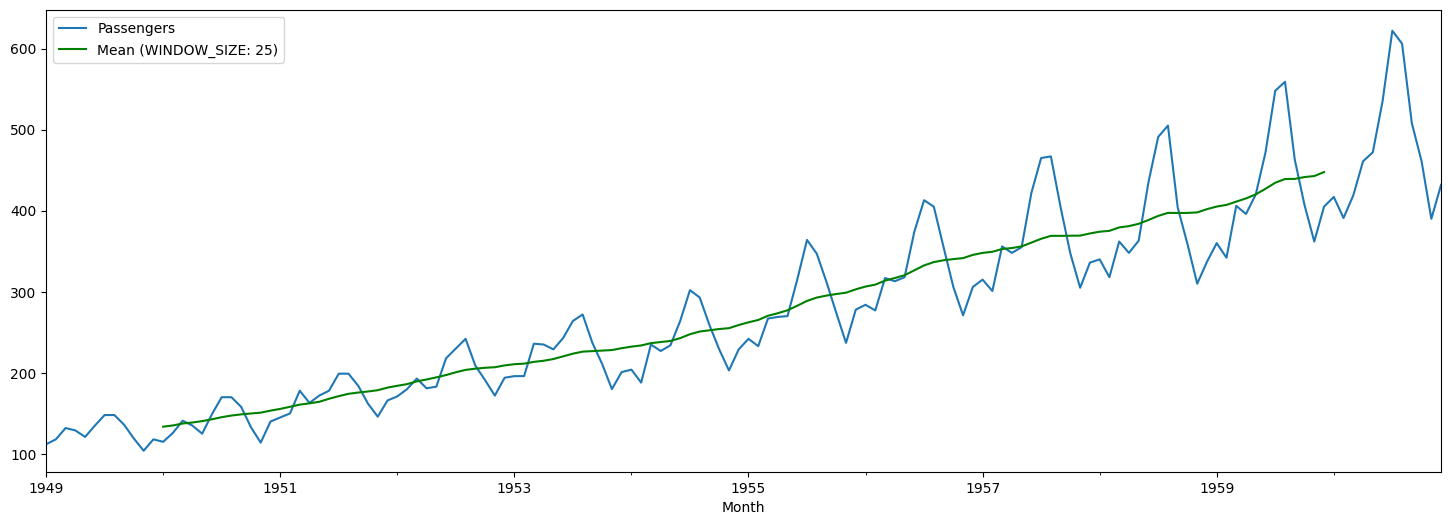

In [71]:
WINDOW_SIZE = 25

r = dt.rolling(window = WINDOW_SIZE, center=True)

figure(figsize=(18, 6))
dt['#Passengers'].plot(label='Passengers')
r.mean()['#Passengers'].plot(label='Mean (WINDOW_SIZE: '+str(WINDOW_SIZE) + ')', color='green');
plt.legend();

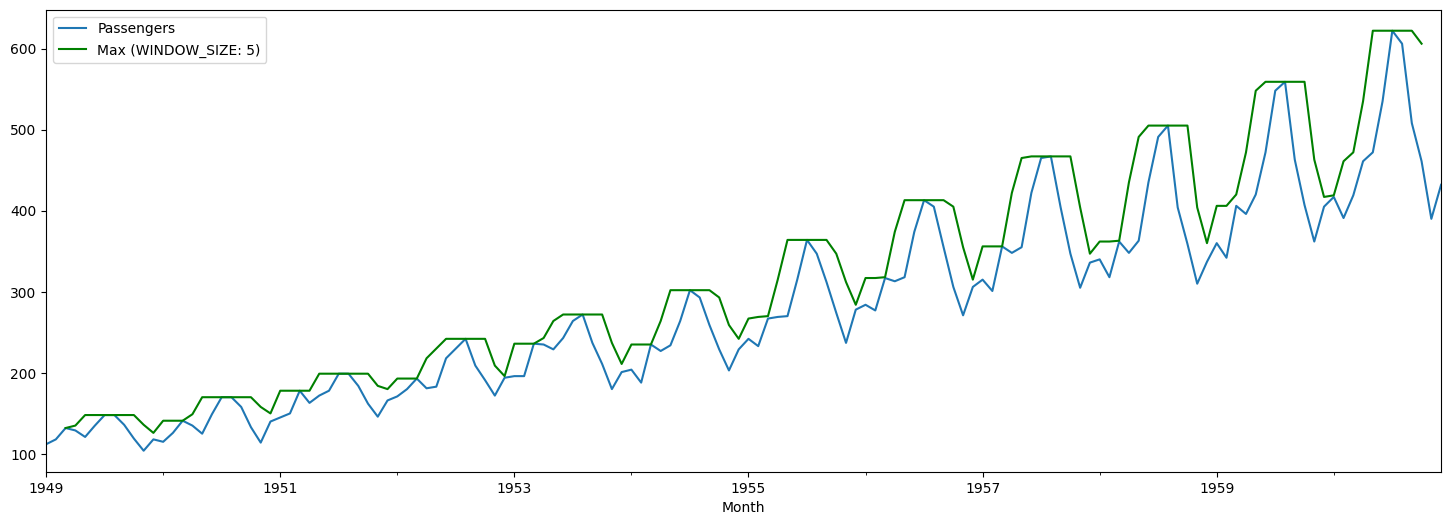

In [72]:
WINDOW_SIZE = 5

r = dt.rolling(window = WINDOW_SIZE, center=True)

figure(figsize=(18, 6))
dt['#Passengers'].plot(label='Passengers')
r.max()['#Passengers'].plot(label='Max (WINDOW_SIZE: '+str(WINDOW_SIZE) + ')', color='green');
plt.legend();

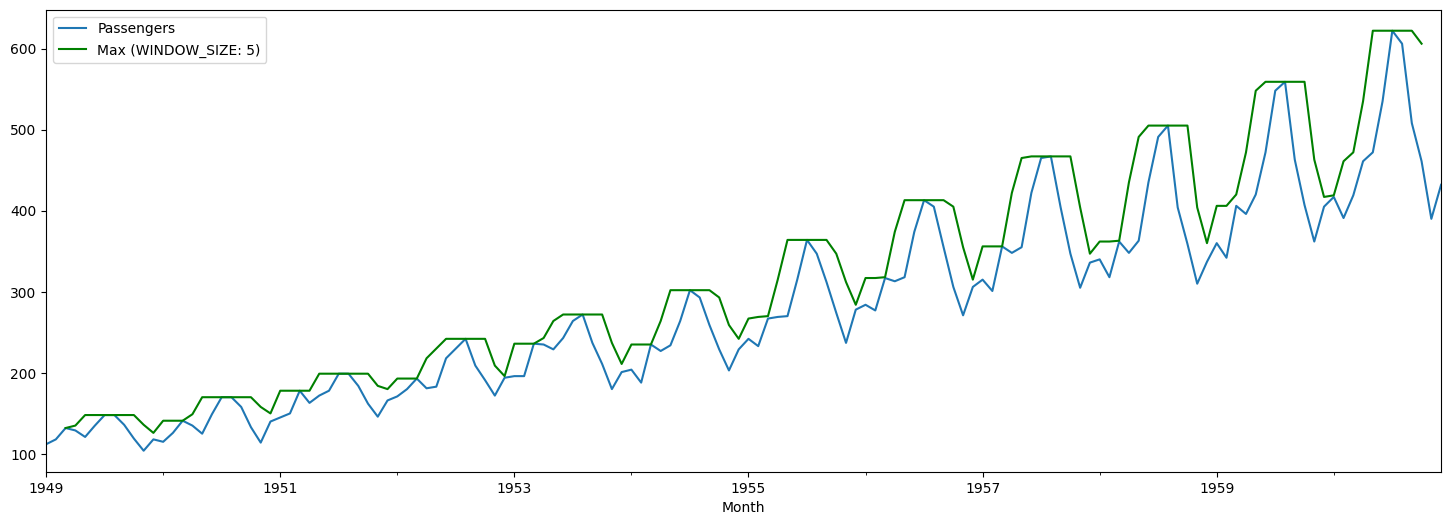

In [73]:
WINDOW_SIZE = 5

r = dt.rolling(window = WINDOW_SIZE, center=True)

figure(figsize=(18, 6))
dt['#Passengers'].plot(label='Passengers')
r.max()['#Passengers'].plot(label='Max (WINDOW_SIZE: '+str(WINDOW_SIZE) + ')', color='green');
plt.legend();

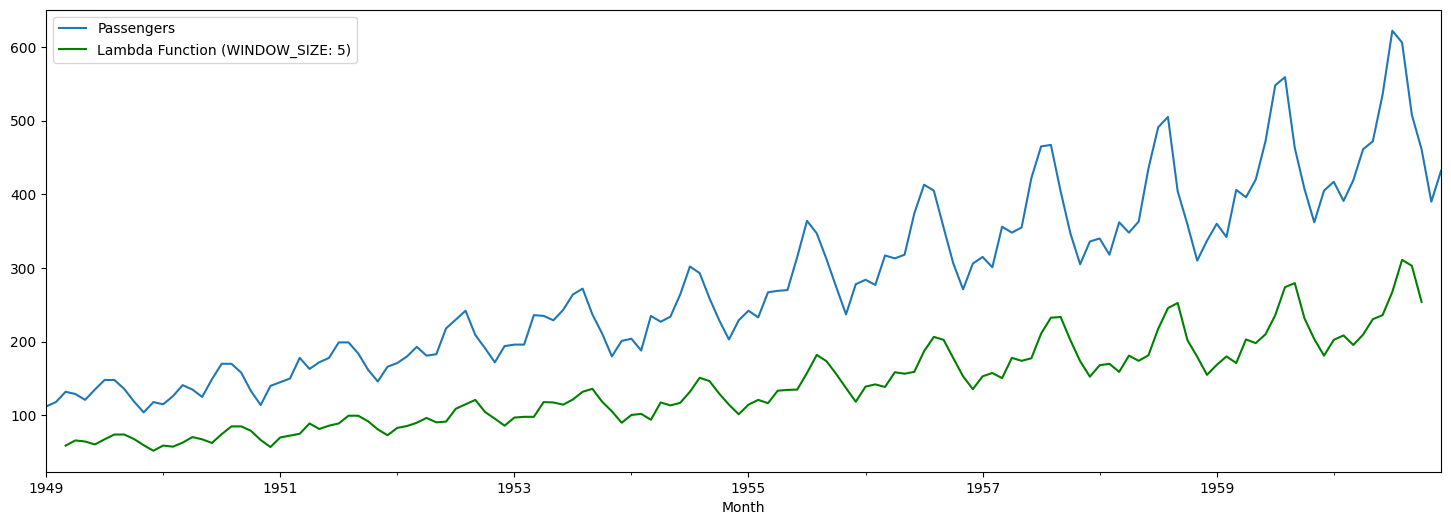

In [74]:
WINDOW_SIZE = 5

r = dt.rolling(window = WINDOW_SIZE, center=True)

figure(figsize=(18, 6))
dt['#Passengers'].plot(label='Passengers')
r['#Passengers'].apply(lambda x: x[1]/2).plot(label='Lambda Function (WINDOW_SIZE: '+str(WINDOW_SIZE) + ')', color='green');
plt.legend();